# Plot playground

### Read all the required data:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
import seaborn as sns
from toolbox import plot_tools
import scipy.stats
from toolbox.wololo import redshift2lumdistance, arcsectokpc
import astropy.units as u
from starlight_toolkit.dust import CAL
from matplotlib.patches import Ellipse

sns.set_style('ticks')
palette = sns.diverging_palette(220, 20, n=7)
halpha_palette = sns.light_palette('goldenrod',  5)
f275w_palette = sns.light_palette('mediumvioletred', 5)
f606w_palette = sns.light_palette('indigo', 5)

age_cmap = sns.diverging_palette(220, 20, as_cmap=True, sep=1)

mass_dict = {'JO201': 44194800000,
             'JO204': 54968402000,
             'JW100': 292875993000,
             'JW39': 164373004000,
             'JO175': 33957900300,
             'JO206': 77743301000
}

halpha_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_bagpipes_input.fits')
f275w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_bagpipes_input.fits')
f606w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_bagpipes_input.fits')
optical_only_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_bagpipes_input.fits')

output_halpha = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_dexp_logprior_single_bagpipes_results.fits')
output_f275w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_dexp_logprior_single_bagpipes_results.fits')
output_f606w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_dexp_logprior_single_bagpipes_results.fits')
output_optical_only = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_dexp_logprior_single_bagpipes_results.fits')

halpha_input = halpha_input[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]
output_halpha = output_halpha[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]

f275w_input = f275w_input[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]
output_f275w = output_f275w[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]

f606w_input = f606w_input[~output_f606w['bad_fit']]
output_f606w = output_f606w[~output_f606w['bad_fit']]

output_halpha['galaxy'] = output_halpha['galaxy'].astype(str)
output_f275w['galaxy'] = output_f275w['galaxy'].astype(str)
output_f606w['galaxy'] = output_f606w['galaxy'].astype(str)

output_halpha['Location'] = np.zeros_like(output_halpha['galaxy'])
output_halpha['Location'][halpha_input['tail_gal_flag'] == 0] = np.full((halpha_input['tail_gal_flag'] == 0).sum(),
                                                                        'Tail')
output_halpha['Location'][halpha_input['tail_gal_flag'] == 1] = np.full((halpha_input['tail_gal_flag'] == 1).sum(),
                                                                        'Extraplanar')

output_f275w['Location'] = np.zeros_like(output_f275w['galaxy'])
output_f275w['Location'][f275w_input['tail_gal_flag'] == 0] = np.full((f275w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f275w['Location'][f275w_input['tail_gal_flag'] == 1] = np.full((f275w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_f606w['Location'] = np.zeros_like(output_f606w['galaxy'])
output_f606w['Location'][f606w_input['tail_gal_flag'] == 0] = np.full((f606w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f606w['Location'][f606w_input['tail_gal_flag'] == 1] = np.full((f606w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_halpha['galaxy_mass'] = np.zeros_like(output_halpha['mwage'])
for i in range(len(output_halpha)):
    output_halpha['galaxy_mass'][i] = np.log10(mass_dict[output_halpha['galaxy'][i]])

output_f275w['galaxy_mass'] = np.zeros_like(output_f275w['mwage'])
for i in range(len(output_f275w)):
    output_f275w['galaxy_mass'][i] = np.log10(mass_dict[output_f275w['galaxy'][i]])

output_f606w['galaxy_mass'] = np.zeros_like(output_f606w['mwage'])
for i in range(len(output_f606w)):
    output_f606w['galaxy_mass'][i] = np.log10(mass_dict[output_f606w['galaxy'][i]])

output_halpha['mwage'] *= 1e3
output_f275w['mwage'] *= 1e3
output_f606w['mwage'] *= 1e3
output_optical_only['mwage'] *= 1e3

output_halpha['age'] *= 1e3
output_f275w['age'] *= 1e3
output_f606w['age'] *= 1e3
output_optical_only['age'] *= 1e3

output_halpha['sfr'] = np.log10(output_halpha['sfr'])
output_f275w['sfr'] = np.log10(output_f275w['sfr'])
output_f606w['sfr'] = np.log10(output_f606w['sfr'])

output_halpha['Av'] = output_halpha['Av'] * output_halpha['eta']
output_f275w['Av'] = output_f275w['Av'] * output_f275w['eta']
output_f606w['Av'] = output_f606w['Av'] * output_f606w['eta']

conversion_factor = arcsectokpc(halpha_input['galaxy_redshift'])
halpha_input['area_exct'] = halpha_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f275w_input['galaxy_redshift'])
f275w_input['area_exct'] = f275w_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f606w_input['galaxy_redshift'])
f606w_input['area_exct'] = f606w_input['area_exact'] * conversion_factor ** 2

print(len(output_halpha), len(output_f275w), len(output_f606w))

# print(np.min(output_f606w['stellar_mass']), np.max(output_f606w['stellar_mass']))
# print(np.percentile(output_f606w['stellar_mass'], 5))

for galaxy in np.unique(output_halpha['galaxy']):
    print(galaxy, (output_halpha['galaxy']==galaxy).sum(), (output_f275w['galaxy']==galaxy).sum(), (output_f606w['galaxy']==galaxy).sum())

347 851 296
JO175 30 55 21
JO201 86 307 85
JO204 28 96 45
JO206 123 196 59
JW100 58 127 33
JW39 22 70 53


They get more compact as they age instead of just growing in size

Most compact ones are older
Ask Eric about DYNAMO-like sizes
PHANGS size-mass

0.19151230161445593 -2.079720509545063
0.1691209601255908 -1.916220807903654
0.35922421031103696 -2.917588306336766


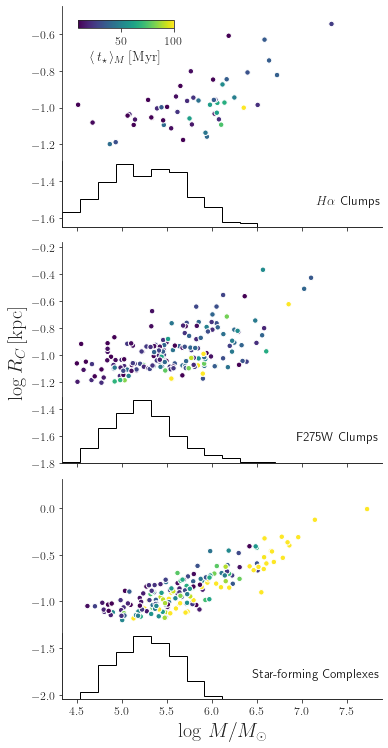

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(5.5, 10.5), sharex=True)

flag = halpha_input['resolved_flag'].astype(bool)

mappable = ax[0].scatter(output_halpha['stellar_mass'][flag], np.log10(halpha_input['r_core_corr'][flag]), s=30, 
                         edgecolors='white', c=output_halpha['mwage'][flag], vmin=10, vmax=100, cmap='viridis')

inset_ax = ax[0].inset_axes([0, 0, 1, 0.3])
inset_ax.set_xticklabels([])
inset_ax.set_yticklabels([])
inset_ax.spines["top"].set_visible(False)
inset_ax.spines["right"].set_visible(False)
inset_ax.patch.set_alpha(0)
inset_ax.tick_params(axis='both', length=0)
inset_ax.set_xlim(3.5, 8)

inset_ax.hist(output_halpha['stellar_mass'][~halpha_input['resolved_flag'].astype(bool)],
              bins=np.arange(3.5, 8, 0.25), histtype='step', color='k')
ax[0].set_ylim(-1.65, -0.45)

correlation = scipy.stats.linregress(output_halpha['stellar_mass'][flag], np.log10(halpha_input['r_core_corr'][flag]))

print(correlation.slope, correlation.intercept)

flag = f275w_input['resolved_flag'].astype(bool)

ax[1].scatter(output_f275w['stellar_mass'][flag], np.log10(f275w_input['r_core_corr'][flag]), s=30, 
              edgecolors='white', c=output_f275w['mwage'][flag], vmin=10, vmax=100, cmap='viridis')

inset_ax = ax[1].inset_axes([0, 0, 1, 0.3])
inset_ax.set_xticklabels([])
inset_ax.set_yticklabels([])
inset_ax.spines["top"].set_visible(False)
inset_ax.spines["right"].set_visible(False)
inset_ax.patch.set_alpha(0)
inset_ax.tick_params(axis='both', length=0)
inset_ax.set_xlim(3.5, 8)

inset_ax.hist(output_f275w['stellar_mass'][~f275w_input['resolved_flag'].astype(bool)],
              bins=np.arange(3.5, 8, 0.25), histtype='step', color='k')
ax[1].set_ylim(-1.8, -0.17)

correlation = scipy.stats.linregress(output_f275w['stellar_mass'][flag], np.log10(f275w_input['r_core_corr'][flag]))

print(correlation.slope, correlation.intercept)

flag = (output_f606w['stellar_mass'] > 3) & f606w_input['resolved_flag'].astype(bool)

ax[2].scatter(output_f606w['stellar_mass'][flag], np.log10(f606w_input['r_core_corr'][flag]), s=30, 
              edgecolors='white', c=output_f606w['mwage'][flag], vmin=10, vmax=100, cmap='viridis')

inset_ax = ax[2].inset_axes([0, 0, 1, 0.3])
inset_ax.set_xticklabels([])
inset_ax.set_yticklabels([])
inset_ax.spines["top"].set_visible(False)
inset_ax.spines["right"].set_visible(False)
inset_ax.patch.set_alpha(0)
inset_ax.tick_params(axis='both', length=0)
inset_ax.set_xlim(3.5, 8)

inset_ax.hist(output_f606w['stellar_mass'][~f606w_input['resolved_flag'].astype(bool)],
              bins=np.arange(3.5, 8, 0.25), histtype='step', color='k')
ax[2].set_ylim(-2.05, 0.32)

correlation = scipy.stats.linregress(output_f606w['stellar_mass'][flag], np.log10(f606w_input['r_core_corr'][flag]))

print(correlation.slope, correlation.intercept)

cb_ax = ax[0].inset_axes([0.05, 0.9, 0.3, 0.04])
cb = plt.colorbar(cax=cb_ax, orientation='horizontal', mappable=mappable)
cb.set_label(r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=14)
cb_ax.tick_params(labelsize=12)

# plt.xlim(4, 8)

labels = [r'$H\alpha$ Clumps', 'F275W Clumps', 'Star-forming Complexes']

for i in range(3):
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].annotate(labels[i], xy=(0.99, 0.1), xycoords='axes fraction', fontsize=13, horizontalalignment='right')

ax[2].set_xlabel(r'$\log\,M/M_\odot$', fontsize=20)
ax[1].set_ylabel(r'$\log R_C \,\mathrm{[kpc]}$', fontsize=20)

fig.tight_layout()
fig.subplots_adjust(hspace=0.07)

sns.despine()

plt.savefig('mass-size.pdf')

2.433382082294713 8.165092767397379
1.9847440150317108 7.504031377011316
2.024821816009723 7.461606066270795


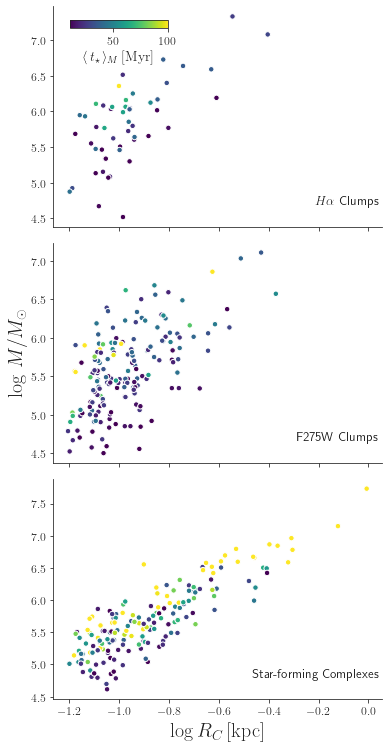

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(5.5, 10.5), sharex=True)

flag = halpha_input['resolved_flag'].astype(bool)

mappable = ax[0].scatter(y=output_halpha['stellar_mass'][flag], x=np.log10(halpha_input['r_core_corr'][flag]), s=30, 
                         edgecolors='white', c=output_halpha['mwage'][flag], vmin=10, vmax=100, cmap='viridis')

correlation = scipy.stats.linregress(y=output_halpha['stellar_mass'][flag], x=np.log10(halpha_input['r_core_corr'][flag]))

print(correlation.slope, correlation.intercept)

flag = f275w_input['resolved_flag'].astype(bool)

ax[1].scatter(y=output_f275w['stellar_mass'][flag], x=np.log10(f275w_input['r_core_corr'][flag]), s=30, 
              edgecolors='white', c=output_f275w['mwage'][flag], vmin=10, vmax=100, cmap='viridis')

correlation = scipy.stats.linregress(y=output_f275w['stellar_mass'][flag], x=np.log10(f275w_input['r_core_corr'][flag]))

print(correlation.slope, correlation.intercept)

flag = (output_f606w['stellar_mass'] > 3) & f606w_input['resolved_flag'].astype(bool)

ax[2].scatter(y=output_f606w['stellar_mass'][flag], x=np.log10(f606w_input['r_core_corr'][flag]), s=30, 
              edgecolors='white', c=output_f606w['mwage'][flag], vmin=10, vmax=100, cmap='viridis')

correlation = scipy.stats.linregress(y=output_f606w['stellar_mass'][flag], x=np.log10(f606w_input['r_core_corr'][flag]))

print(correlation.slope, correlation.intercept)

cb_ax = ax[0].inset_axes([0.05, 0.9, 0.3, 0.04])
cb = plt.colorbar(cax=cb_ax, orientation='horizontal', mappable=mappable)
cb.set_label(r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=14)
cb_ax.tick_params(labelsize=12)

labels = [r'$H\alpha$ Clumps', 'F275W Clumps', 'Star-forming Complexes']

for i in range(3):
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].annotate(labels[i], xy=(0.99, 0.1), xycoords='axes fraction', fontsize=13, horizontalalignment='right')

ax[1].set_ylabel(r'$\log\,M/M_\odot$', fontsize=20)
ax[2].set_xlabel(r'$\log R_C \,\mathrm{[kpc]}$', fontsize=20)

fig.tight_layout()
fig.subplots_adjust(hspace=0.07)

sns.despine()

plt.savefig('mass-size.pdf')

6.64
6.36
6.31


<ipython-input-3-cecf95f15121>:84: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  ax[1].set_yscale('Log')


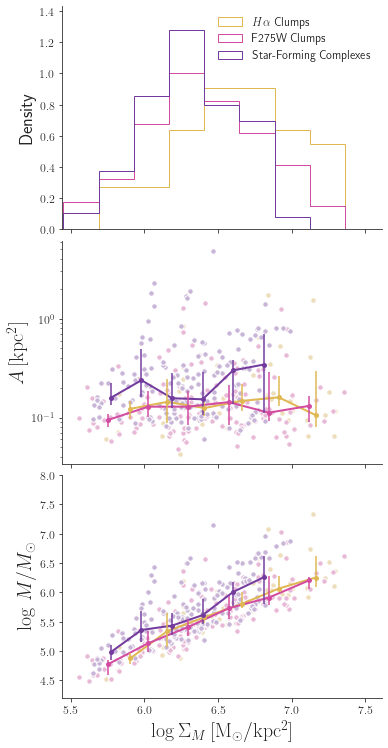

In [3]:
fig, ax = plt.subplots(3, 1, figsize=(5.5, 10.5), sharex=True)

flag = halpha_input['resolved_flag'].astype(bool)

print(np.round(np.median(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag]), 2))
# print(np.percentile(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag], 95))

ax[0].hist(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag], color=halpha_palette[3],
           histtype='step', range=[5.45, 7.6], density=True, label=r'$H\alpha$ Clumps', bins=9)


ax[1].scatter(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag],
              halpha_input['area_exact'][flag], color=halpha_palette[1],
              label=r'$H\alpha$ Clumps', edgecolors='white', s=30)
plot_tools.plot_median_in_bins(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag],
                               halpha_input['area_exact'][flag], color=halpha_palette[3], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=halpha_palette[3])

ax[2].scatter(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag],
              output_halpha['stellar_mass'][flag], color=halpha_palette[1],
              label=r'$H\alpha$ Clumps', edgecolors='white', s=30)
plot_tools.plot_median_in_bins(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag],
                               output_halpha['stellar_mass'][flag], color=halpha_palette[3], ax=ax[2],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=halpha_palette[3])

# print('median area halpha', np.median(halpha_input['area_exact'][flag]))

flag = f275w_input['resolved_flag'].astype(bool)

# print(np.min(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag]), np.max(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag]))

print(np.round(np.median(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag]), 2))
# print(np.percentile(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag], 95))

ax[0].hist(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag], color=f275w_palette[3],
           histtype='step', range=[5.45, 7.6], density=True, label=r'F275W Clumps', bins=9)


ax[1].scatter(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag],
              f275w_input['area_exact'][flag], color=f275w_palette[1],
              label=r'F275W Clumps', edgecolors='white', s=30)
plot_tools.plot_median_in_bins(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag],
                               f275w_input['area_exact'][flag], color=f275w_palette[3], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=f275w_palette[3])


ax[2].scatter(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag],
              output_f275w['stellar_mass'][flag], color=f275w_palette[1],
              label=r'F275W Clumps', edgecolors='white', s=30)
plot_tools.plot_median_in_bins(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag],
                               output_f275w['stellar_mass'][flag], color=f275w_palette[3], ax=ax[2],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=f275w_palette[3])

flag = f606w_input['resolved_flag'].astype(bool)

print(np.round(np.median(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag]), 2))
# print(np.round(np.percentile(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag], 95), 2))

ax[0].hist(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag], color=f606w_palette[3],
           histtype='step', range=[5.45, 7.6], density=True, label=r'Star-Forming Complexes', bins=9)


ax[1].scatter(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
              f606w_input['area_exact'][flag], color=f606w_palette[1],
              label=r'Star-Forming Complexes', edgecolors='white', s=30)
plot_tools.plot_median_in_bins(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
                               f606w_input['area_exact'][flag], color=f606w_palette[3], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=f606w_palette[3])


ax[2].scatter(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
              output_f606w['stellar_mass'][flag], color=f606w_palette[1],
              label=r'Star-Forming Complexes', edgecolors='white', s=30)
plot_tools.plot_median_in_bins(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
                               output_f606w['stellar_mass'][flag], color=f606w_palette[3], ax=ax[2],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=f606w_palette[3])

ax[1].set_yscale('Log')


ax[0].set_ylim(0, 1.43)
plt.xlim(5.44, 7.61)
ax[2].set_ylim(4.2, 8)

ax[0].set_ylabel(r'Density', fontsize=18)
plt.xlabel(r'$\log \Sigma_M\,\mathrm{[M_\odot/kpc^2]}$', fontsize=20)
ax[1].set_ylabel(r'$A\,\mathrm{[kpc^2]}$', fontsize=20)
ax[2].set_ylabel(r'$\log\,M/M_\odot$', fontsize=20)

ax[0].legend(frameon=False, fontsize=12)

ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)
ax[2].tick_params(axis='both', labelsize=12)

sns.despine()

plt.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

plt.savefig('sigma_mass-mass.pdf')
plt.savefig('sigma_mass-mass_presentations.jpg', dpi=300)

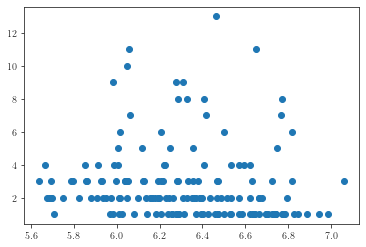

In [37]:
flag = f606w_input['resolved_flag'].astype(bool)

plt.scatter(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
            (f606w_input['NHa']+f606w_input['Nf275w'])[flag])

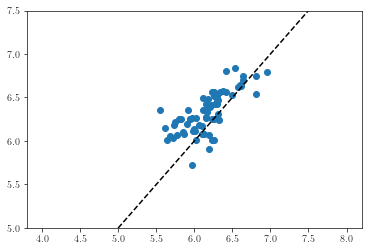

In [72]:
flag = f275w_input['parent_resolved_flag'].astype(bool) & f275w_input['resolved_flag'].astype(bool)

plt.scatter(np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag],
            np.log10((10**output_f275w['parent_stellar_mass_optical_only'])/f275w_input['parent_area_optical_only'])[flag])
plt.ylim(5, 7.5)

x = np.linspace(4, 8)
y = x

plt.plot(x, y, '--k')

<ipython-input-70-41f964b3afed>:4: RuntimeWarning: divide by zero encountered in divide
  np.log10((10**output_halpha['parent_stellar_mass'])/halpha_input['parent_area'])[flag])


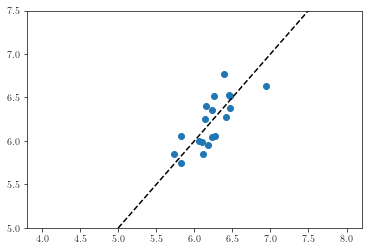

In [70]:
flag = halpha_input['parent_resolved_flag'].astype(bool) & halpha_input['resolved_flag'].astype(bool)

plt.scatter(np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag],
            np.log10((10**output_halpha['parent_stellar_mass'])/halpha_input['parent_area'])[flag])
plt.ylim(5, 7.5)

x = np.linspace(4, 8)
y = x

plt.plot(x, y, '--k')

2.3195688101428034 7.141298388399395


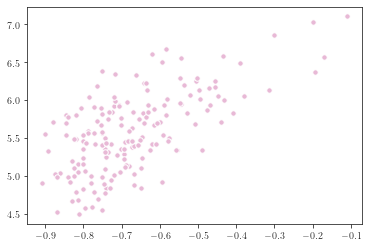

In [50]:
flag = f275w_input['resolved_flag'].astype(bool)

plt.scatter(np.log10(np.sqrt(f275w_input['area_exact'][flag]/np.pi)),
            output_f275w['stellar_mass'][flag],
            color=f275w_palette[1],
            label=r'F275W clumps', edgecolors='white', s=30)

correlation = scipy.stats.linregress(np.log10(np.sqrt(f275w_input['area_exact'][flag]/np.pi)), output_f275w['stellar_mass'][flag])

print(correlation.slope, correlation.intercept)


2.3150220815301195 6.9898338750836935


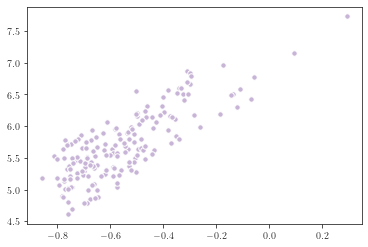

In [54]:
flag = f606w_input['resolved_flag'].astype(bool) & (output_f606w['stellar_mass']>3)

plt.scatter(np.log10(np.sqrt(f606w_input['area_exact'][flag]/np.pi)),
            output_f606w['stellar_mass'][flag],
            color=f606w_palette[1],
            label=r'Complexes', edgecolors='white', s=30)

correlation = scipy.stats.linregress(np.log10(np.sqrt(f606w_input['area_exact'][flag]/np.pi)), output_f606w['stellar_mass'][flag])

print(correlation.slope, correlation.intercept)


2.487691107671821 7.431230277797502


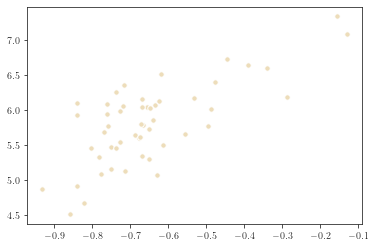

In [51]:
flag = halpha_input['resolved_flag'].astype(bool)

plt.scatter(np.log10(np.sqrt(halpha_input['area_exact'][flag]/np.pi)),
            output_halpha['stellar_mass'][flag],
            color=halpha_palette[1],
            label=r'$H\alpha$ clumps', edgecolors='white', s=30)

correlation = scipy.stats.linregress(np.log10(np.sqrt(halpha_input['area_exact'][flag]/np.pi)), output_halpha['stellar_mass'][flag])

print(correlation.slope, correlation.intercept)

(-2.0, 0.0)

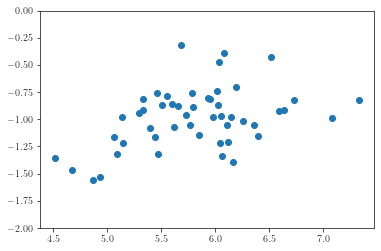

In [82]:
flag = halpha_input['resolved_flag'].astype(bool)

plt.scatter(output_halpha['stellar_mass'][flag], output_halpha['sigma_sfr'][flag])

plt.ylim(-2, 0)